In [ ]:
import random

In [12]:
random.seed(1234)

random.random()

0.9664535356921388

In [13]:
random.seed(1234)

random.random()

0.9664535356921388

 ## Uniform distribution

In [11]:
random.uniform(0,10) #All numbers on the range have an equal probability of being selected

9.929356256117124

In [ ]:
unifNumbers = [random.uniform(0,1) for _ in range(1000)] #Create a list of 1k numbers between 0 and 1

## Normal distribution

In [14]:
#The mean (mu) and the standard deviation (sigma) need to be specified to use normal
mu = 0  
sigma = 1

random.normalvariate(mu, sigma)

-0.10244231550508444

In [19]:
mu = 5
sigma = 2

random.normalvariate(mu,sigma)

3.523913883481894

In [20]:
#As with uniform, we can also create a list
mu = 0
sigma = 1

normNumbers = [random.normalvariate(mu, sigma) for _ in range(1000)]

## Random sampling from a population

In [21]:
import random
import numpy as np

In [22]:
mu = 0
sigma = 1

population = [random.normalvariate(mu, sigma) for _ in range(10000)]

In [25]:
sampleA = random.sample(population, 500)
sampleB = random.sample(population, 500)

In [29]:
print(np.mean(sampleA))

print(np.std(sampleA))

0.00448804207140314
1.0175471263893543


In [31]:
print(np.mean(sampleB))

print(np.std(sampleB))

-0.027632401131765
1.0095477581196424


In [38]:
means = [np.mean(random.sample(population, 1000)) for _ in range(100)] #create a 100 samples with 1k units each

print(np.mean(means))

-0.0001469688956022048


In [40]:
stds = [np.std(random.sample(population, 1000)) for _ in range(100)]

np.mean(stds)

0.9897515083289781

In [42]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [44]:
random.seed(1738)

In [45]:
mu = 7
sigma = 1.7

observations = [random.normalvariate(mu, sigma) for _ in range(100000)]

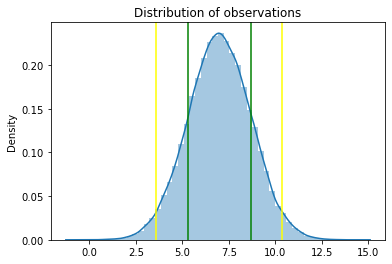

In [54]:
sns.distplot(observations).set(title = 'Distribution of observations')
plt.axvline(np.mean(observations) + np.std(observations), color = 'green')
plt.axvline(np.mean(observations) - np.std(observations), color = 'green')

plt.axvline(np.mean(observations) + 2*(np.std(observations)), color = 'yellow')
plt.axvline(np.mean(observations) - 2*(np.std(observations)), color = 'yellow')


plt.show()

In [57]:
pd.Series(observations).describe()

count    100000.000000
mean          7.000626
std           1.693249
min          -0.754203
25%           5.865611
50%           7.003080
75%           8.144851
max          14.595650
dtype: float64

In [58]:
sampleA = random.sample(observations, 100)
sampleB = random.sample(observations, 100)
sampleC = random.sample(observations, 100)

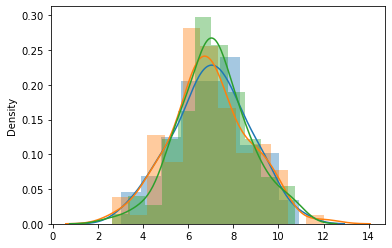

In [61]:
fig, ax = plt.subplots()

sns.distplot(sampleA, ax = ax)
sns.distplot(sampleB, ax = ax)
sns.distplot(sampleC, ax = ax)

plt.show()

In [64]:
from statsmodels.distributions.empirical_distribution import ECDF

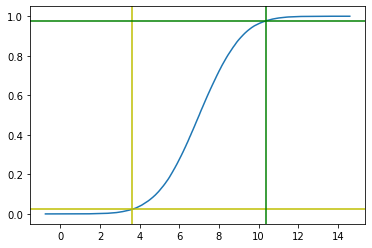

In [72]:
ecdf = ECDF(observations)

plt.plot(ecdf.x, ecdf.y)
plt.axhline(y = 0.025, color ='y', linestyle = '-')
plt.axvline(x = np.mean(observations) - 2*(np.std(observations)), color ='y')

plt.axhline(y = 0.975, color ='g', linestyle = '-')
plt.axvline(x = np.mean(observations) + 2*(np.std(observations)), color ='g', linestyle = '-')